In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import shutil
import tqdm


In [3]:
### READ IN Boston AirBnB Data
bos_cal = pd.read_csv("./data/02_boston/calendar.csv")
bos_lis = pd.read_csv("./data/02_boston/listings.csv")
bos_rev = pd.read_csv("./data/02_boston/reviews.csv")

In [4]:
### READ IN Boston AirBnB Data
sea_cal = pd.read_csv("./data/01_seattle/calendar.csv")
sea_lis = pd.read_csv("./data/01_seattle/listings.csv")
sea_rev = pd.read_csv("./data/01_seattle/reviews.csv")

In [5]:
### Data Preview >> Calendar 
sea_cal.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [6]:
### Data Preview >> Listings 
sea_lis.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
sea_lis.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [8]:
### Data Preview > Reviews
sea_rev.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


**QUESTIONS**

Picked Datasets: AirBnB Boston & Seattle
Questions:
    1. Is their a seasonal trend in the booking quota and differs it between east and west coast?
    2. Is their a sweetspot price range for both cities?
    3. What is more important for a good booking quota: price or rating?


**DATA EXPLORATION**

In [9]:
sea_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [10]:

sea_cal.shape[0]

1393570

In [11]:
nan_rows = sea_cal[sea_cal["price"].isna()]
nan_rows.available.value_counts()

available
f    459028
Name: count, dtype: int64

In [12]:
ava_rows = sea_cal[sea_cal["available"]=="t"]
ava_rows.price.isna().sum()

np.int64(0)

==> a nan value in the price column is only given if an apartment was taken and therefore not available
==> no need to fill the NaN values or delete the NaN rows

**Question 1:**
Is there a seasonal trend in the booking quota and differs it between east and west?

Data Preparation

In [72]:
# Helper function to transform the prices stored as an string into floats
def transform_price(price: str)->float:
    price = price.replace('$','')
    price = price.replace(',', '') if '.' in price else price.replace('.', '')
    return float(price)

In [73]:
# Function for creating a df with the date, listings, listings_booked and the quota (=f / (t+f))
# for each day over all listings
def create_quota_df(cal_df: pd.DataFrame)->pd.DataFrame:
    
    ### create the later return df
    df = pd.DataFrame(columns=["date", "listings", "listings_booked", "quota", "avg_price"])

    for date in cal_df.date.unique():

        ### how much listings were available at that specific date
        rows_date = cal_df[cal_df['date']==date]
        listings = rows_date.shape[0]

        ### how much of these listings were booked
        rows_taken = rows_date[rows_date['available']=="f"]
        listings_booked = rows_taken.shape[0]

        ### what was the average price of the open bookings on that day
        rows_ava = rows_date[rows_date['available']=="t"]
        rows_ava.price = rows_ava.price.apply(transform_price)
        avg_price = rows_ava.price.mean()

        ### % of booked listings from all available
        quota = listings_booked / listings

        ### Load all this information in and DataFrame and append it to the return df
        df_temp = pd.DataFrame([[date, int(listings), int(listings_booked), quota, avg_price]], columns=["date", "listings", "listings_booked", "quota", "avg_price"])
        df = pd.concat([df, df_temp], axis=0, ignore_index=True)
   

    ### Reset the index and transform the dtypes
    df.reset_index()
    df.listings = df.listings.astype(int)
    df.listings_booked = df.listings_booked.astype(int)
    
    return df

In [94]:
# Calc the quota df 

df_quota_sea = create_quota_df(sea_cal)
df_quota_bos = create_quota_df(bos_cal)


C:\Users\P334257\AppData\Local\Temp\1\ipykernel_26388\868816841.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_ava.price = rows_ava.price.apply(transform_price)
C:\Users\P334257\AppData\Local\Temp\1\ipykernel_26388\868816841.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], axis=0, ignore_index=True)
C:\Users\P334257\AppData\Local\Temp\1\ipykernel_26388\868816841.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [75]:
df_quota_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             365 non-null    object 
 1   listings         365 non-null    int64  
 2   listings_booked  365 non-null    int64  
 3   quota            365 non-null    float64
 4   avg_price        365 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 14.4+ KB


In [76]:
df_quota_sea.describe()

,listings,listings_booked,quota,avg_price
count,365.0,365.000000,365.000000,365.000000
mean,3818.0,1257.610959,0.329390,137.901783
std,0.0,182.879102,0.047899,9.860142
min,3818.0,896.000000,0.234678,117.685413
25%,3818.0,1136.000000,0.297538,132.446443
50%,3818.0,1241.000000,0.325039,136.731206
75%,3818.0,1347.000000,0.352803,146.930502
max,3818.0,2083.000000,0.545574,157.480000


In [95]:
df_quota_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             365 non-null    object 
 1   listings         365 non-null    int64  
 2   listings_booked  365 non-null    int64  
 3   quota            365 non-null    float64
 4   avg_price        365 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 14.4+ KB


In [96]:
df_quota_bos.describe()

,listings,listings_booked,quota,avg_price
count,365.0,365.000000,365.000000,365.000000
mean,3586.0,1824.254795,0.508716,201.165200
std,0.0,273.240049,0.076196,20.989130
min,3586.0,1379.000000,0.384551,177.023002
25%,3586.0,1640.000000,0.457334,186.764936
50%,3586.0,1815.000000,0.506135,196.100469
75%,3586.0,1848.000000,0.515337,205.207474
max,3586.0,3016.000000,0.841049,286.921977


Visualization

In [91]:
def plot_quota_price(df:pd.DataFrame, city:str):
    fig1, ax1 = plt.subplots(figsize=(10,6))

    sns.lineplot(x='date', y='quota', data=df, ax=ax1, color='red')

    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Booking Quota in %', color='red')

    ax2 = ax1.twinx()

    sns.lineplot(x='date', y='avg_price', data=df, ax=ax2, color='black')
    ax2.set_ylabel('Average Price', color='black')

    plt.title(city)
    plt.show()


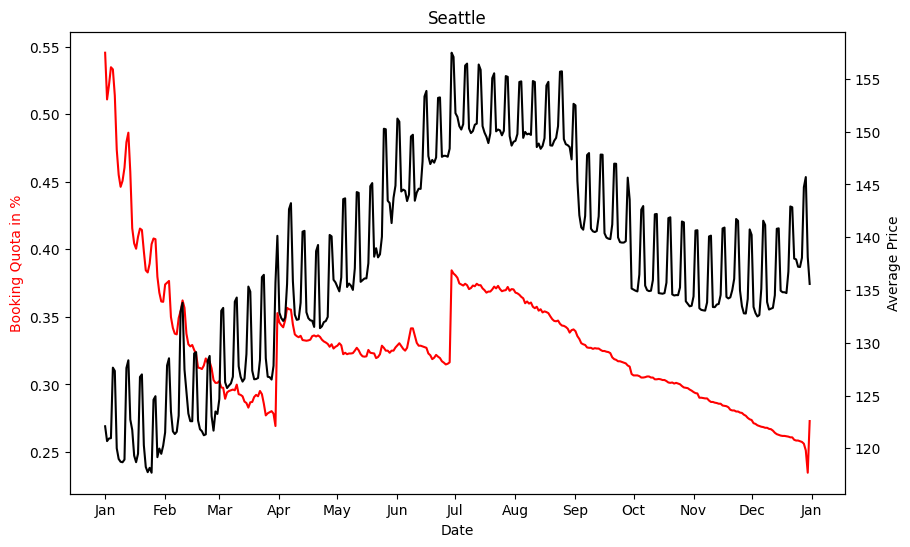

In [92]:
plot_quota_price(df_quota_sea, 'Seattle')


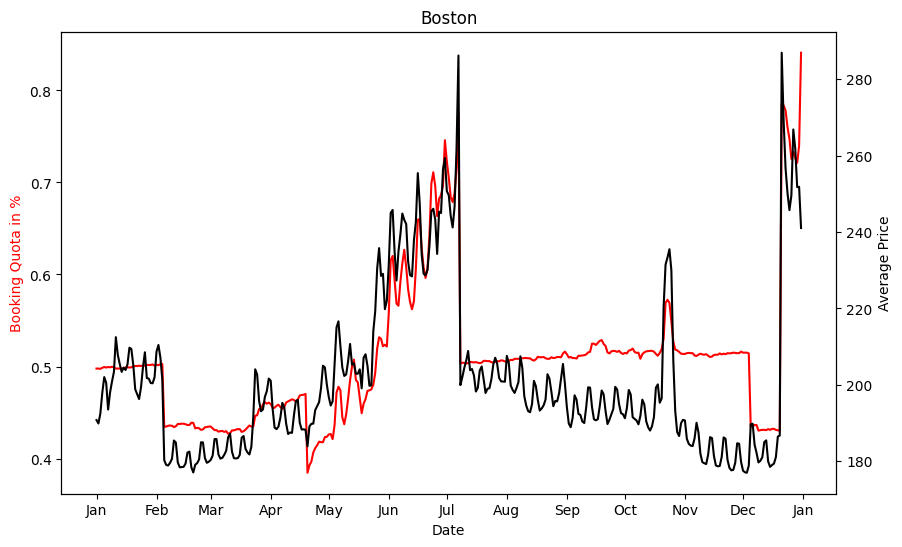

In [97]:
plot_quota_price(df_quota_bos, 'Boston')

Analyze and Answer to the Questions

Is there a seasonal trend in the booking quota and differs it between east and west?

A real seansonal trend that fits boths cities could not be observed. On the contrary - they differ a lot!

In Seattle the booking quota kicks of high in the beginning of the year and then gradually declines till the end of april (55% > 27%). Then it suddenly peaks back up to 35%. Maybe due to the beginning of spring brake and more people traveling. While slowly declining from their again till the end of June (35% > 32%) it peaks again in the beginning of July to some 38%. Probably due to July 4th. From their on it constantly declines all the way down to 25%. Taking the average available price graph into the discussion it seems like price and the quota are not really coupled - at least not obviously. Maybe the data has to be further be enhanced by ratings which could also play a crucial role for price and availabilty. But interstingly the the weekend price peaks can be observed. Furthermore the price curve seems to top out with a flat plataue over the sommer months, when a lot of americans are on vacation.

On the contrary the the price and booking curves are more coupled in Boston. In general the price level in Boston is way higher. And the holidays (July 4th, Thanksgiving, Christmas & New Year) are way more visibile in both - the price and booking curves. The first half of the year seems to be coupled quite close, while the second half (apart from the holidays) seems to start decoupling. The booking quota stays stable at around 50% while the prices drop countinously by up to 10-15% till the end of the year.

To sum it up. Spikes for the holidays could be well observed as well as general higher price and booking quota level during school of periods for the two cities. Also the weekend peaks are obvious in both citys. But a connections betweens the booking quota and the price could only be observed in Boston. So seasonal trends could be seen but east and west differ a lot (4th of July aside).

**Question 2:** Is their a sweetspot price range for both cities?

To answer this question I want to put togheter a table with each listing, its price and its average booking quote over the whole year and then create clusters of the listings in x$ steps and compare the booking quota over these clusters!

In [137]:
rel_col = ['id', 'host_id', 'host_since',
       'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'cancellation_policy',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']

focus_col = ['id', 'price', 'number_of_reviews', 'review_scores_rating', 'availability_365']

In [138]:
sea_lis_red = sea_lis[rel_col]
sea_lis_red.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,956883,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,100%,f,3.0,3.0,...,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,2,4.07
1,953595,5177328,2013-02-21,"Seattle, Washington, United States",within an hour,98%,100%,t,6.0,6.0,...,10.0,10.0,10.0,10.0,10.0,10.0,strict,t,6,1.48
2,3308979,16708587,2014-06-12,"Seattle, Washington, United States",within a few hours,67%,100%,f,2.0,2.0,...,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,2,1.15
3,7421966,9851441,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,f,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,f,1,NaN
4,278830,1452570,2011-11-29,"Seattle, Washington, United States",within an hour,100%,NaN,f,2.0,2.0,...,9.0,9.0,10.0,10.0,9.0,9.0,strict,f,1,0.89


In [146]:
sea_lis_foc = sea_lis[focus_col]
sea_lis_foc.price = sea_lis_foc.price.apply(transform_price)
sea_lis_foc.head()

C:\Users\P334257\AppData\Local\Temp\1\ipykernel_26388\2780312932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sea_lis_foc.price = sea_lis_foc.price.apply(transform_price)


,id,price,number_of_reviews,review_scores_rating,availability_365
0,241032,85.0,207,95.0,346
1,953595,150.0,43,96.0,291
2,3308979,975.0,20,97.0,220
3,7421966,100.0,0,NaN,143
4,278830,450.0,38,92.0,365


In [207]:
bos_lis_foc = bos_lis[focus_col]
bos_lis_foc.price = bos_lis_foc.price.apply(transform_price)
bos_lis_foc.head()

C:\Users\P334257\AppData\Local\Temp\1\ipykernel_26388\2674639108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bos_lis_foc.price = bos_lis_foc.price.apply(transform_price)


,id,price,number_of_reviews,review_scores_rating,availability_365
0,12147973,250.0,0,NaN,0
1,3075044,65.0,36,94.0,359
2,6976,65.0,41,98.0,319
3,1436513,75.0,1,100.0,98
4,7651065,79.0,29,99.0,334


In [208]:
sea_lis_foc.describe()

,id,price,number_of_reviews,review_scores_rating,availability_365
count,3.818000e+03,3818.000000,3818.000000,3171.000000,3818.000000
mean,5.550111e+06,127.976166,22.223415,94.539262,244.772656
std,2.962660e+06,90.250022,37.730892,6.606083,126.772526
min,3.335000e+03,20.000000,0.000000,20.000000,0.000000
25%,3.258256e+06,75.000000,2.000000,93.000000,124.000000
50%,6.118244e+06,100.000000,9.000000,96.000000,308.000000
75%,8.035127e+06,150.000000,26.000000,99.000000,360.000000
max,1.034016e+07,1000.000000,474.000000,100.000000,365.000000


In [209]:
sea_lis_foc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   int64  
 1   price                 3818 non-null   float64
 2   number_of_reviews     3818 non-null   int64  
 3   review_scores_rating  3171 non-null   float64
 4   availability_365      3818 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 149.3 KB


In [210]:
bos_lis_foc.describe()

,id,price,number_of_reviews,review_scores_rating,availability_365
count,3.585000e+03,3585.000000,3585.000000,2772.000000,3585.000000
mean,8.440875e+06,173.925802,19.044630,91.916667,179.346444
std,4.500787e+06,148.331321,35.571658,9.531686,142.136180
min,3.353000e+03,10.000000,0.000000,20.000000,0.000000
25%,4.679319e+06,85.000000,1.000000,89.000000,19.000000
50%,8.577620e+06,150.000000,5.000000,94.000000,179.000000
75%,1.278953e+07,220.000000,21.000000,98.250000,325.000000
max,1.493346e+07,4000.000000,404.000000,100.000000,365.000000


In [211]:
bos_lis_foc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3585 non-null   int64  
 1   price                 3585 non-null   float64
 2   number_of_reviews     3585 non-null   int64  
 3   review_scores_rating  2772 non-null   float64
 4   availability_365      3585 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 140.2 KB


In [159]:
def calc_quota_year(df_cal: pd.DataFrame, df_lis: pd.DataFrame, id: int)->float:
    df_id = df_cal[df_cal['listing_id']==id]
    days_booked = df_id[df_id['available']=='f'].shape[0]
    quota = days_booked/df_id.shape[0]
    return float(quota)

In [201]:
# Function to create a df with the price and booking quota and rating per listing id
def create_q2_df(df: pd.DataFrame, df_cal: pd.DataFrame)->pd.DataFrame:
    
    # create the later return df
    df_return = pd.DataFrame(columns=["id", "price", "quota", "rating", "num_ratings"])

    # go through all the listings and grab/calc the relevant information
    for id in tqdm.tqdm(df.id.unique()):
        id_row = df[df["id"]==id]
        price =  float(id_row.price.iloc[0])
        rating = float(id_row.review_scores_rating.iloc[0])
        num_rat = int(id_row.number_of_reviews.iloc[0])
        quota = calc_quota_year(df_cal, df, id)
        #print(f"{id}: price > {price} // rating > {rating} // #revs: {num_rat} // quota > {quota}")
        df_temp = pd.DataFrame([[id, price, quota, rating, num_rat]], columns=["id", "price", "quota", "rating", "num_ratings"])
        df_return = pd.concat([df_return, df_temp], axis=0, ignore_index=True)

    return df_return

In [202]:
 ### create the later return df

df_sea = create_q2_df(sea_lis_foc, sea_cal)
df_sea

  0%|          | 0/3818 [00:00<?, ?it/s]C:\Users\P334257\AppData\Local\Temp\1\ipykernel_26388\463711037.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_return = pd.concat([df_return, df_temp], axis=0, ignore_index=True)
100%|██████████| 3818/3818 [00:11<00:00, 325.82it/s]


,id,price,quota,rating,num_ratings
0,241032,85.0,0.052055,95.0,207
1,953595,150.0,0.202740,96.0,43
2,3308979,975.0,0.397260,97.0,20
3,7421966,100.0,0.608219,NaN,0
4,278830,450.0,0.000000,92.0,38
...,...,...,...,...,...
3813,8101950,359.0,0.912329,80.0,1
3814,8902327,79.0,0.252055,100.0,2
3815,10267360,93.0,0.758904,NaN,0
3816,9604740,99.0,0.509589,NaN,0


In [204]:
df_sea.describe()

,price,quota,rating
count,3818.000000,3818.000000,3171.000000
mean,127.976166,0.329390,94.539262
std,90.250022,0.347322,6.606083
min,20.000000,0.000000,20.000000
25%,75.000000,0.013699,93.000000
50%,100.000000,0.156164,96.000000
75%,150.000000,0.660274,99.000000
max,1000.000000,1.000000,100.000000


In [212]:
df_bos = create_q2_df(bos_lis_foc, bos_cal)
df_bos

  0%|          | 0/3585 [00:00<?, ?it/s]C:\Users\P334257\AppData\Local\Temp\1\ipykernel_26388\463711037.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_return = pd.concat([df_return, df_temp], axis=0, ignore_index=True)
100%|██████████| 3585/3585 [00:09<00:00, 377.36it/s]


,id,price,quota,rating,num_ratings
0,12147973,250.0,1.000000,NaN,0
1,3075044,65.0,0.016438,94.0,36
2,6976,65.0,0.126027,98.0,41
3,1436513,75.0,0.731507,100.0,1
4,7651065,79.0,0.084932,99.0,29
...,...,...,...,...,...
3580,8373729,69.0,0.024658,90.0,4
3581,14844274,150.0,0.002740,NaN,0
3582,14585486,198.0,0.890411,NaN,0
3583,14603878,65.0,0.306849,90.0,2


In [213]:
df_bos.describe()

,price,quota,rating
count,3585.000000,3585.000000,2772.000000
mean,173.925802,0.508640,91.916667
std,148.331321,0.389414,9.531686
min,10.000000,0.000000,20.000000
25%,85.000000,0.109589,89.000000
50%,150.000000,0.509589,94.000000
75%,220.000000,0.947945,98.250000
max,4000.000000,1.000000,100.000000


In [231]:
# function to add the price clusters (according to the step and max_range) and calc the means for quota and rating
def make_clusters(df: pd.DataFrame, max_range: int=600, step: int=25)->pd.DataFrame:
    # create the bins
    bins = list(range(0, max_range+step, step)) + [float('inf')]
    labels = [f"{b}-{b + step - 1}" for b in bins[:-2]] + [f"{max_range}+"]
    #print(bins)

    # add the according bin per listing in a seperate column
    df['price_cluster'] = pd.cut(df['price'], bins=bins, labels=labels)

    # grouping and aggregation
    grouped = df.groupby('price_cluster')
    summary = grouped.agg(mean_quota= ('quota', 'mean'), mean_rating=('rating', 'mean'), count = ('quota', 'size'))

    return summary

In [252]:
max_range = 600
step = 50

res_sea = make_clusters(df_sea, max_range, step)
res_bos = make_clusters(df_bos, max_range, step)

C:\Users\P334257\AppData\Local\Temp\1\ipykernel_26388\2601758999.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('price_cluster')
C:\Users\P334257\AppData\Local\Temp\1\ipykernel_26388\2601758999.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('price_cluster')


In [253]:
res_sea

,mean_quota,mean_rating,count
price_cluster,,,
0-49,0.329780,93.529197,349
50-99,0.326201,94.577778,1611
100-149,0.323151,94.390215,979
150-199,0.340784,94.582386,422
200-249,0.337028,94.987421,198
250-299,0.363918,96.407895,100
300-349,0.404018,95.708333,60
350-399,0.270700,94.363636,36
400-449,0.324984,95.500000,21


In [254]:
res_bos

,mean_quota,mean_rating,count
price_cluster,,,
0-49,0.591005,87.168831,226
50-99,0.494456,91.101535,1026
100-149,0.526864,92.377570,668
150-199,0.541647,93.035714,669
200-249,0.513021,92.548276,380
250-299,0.488203,93.112195,268
300-349,0.376810,91.771739,140
350-399,0.429903,92.163934,82
400-449,0.363379,93.681818,30


In [255]:
res_sea['dataset'] = "Seattle"
res_bos['dataset'] = "Boston"
res_combined = pd.concat([res_sea, res_bos])


Visualization

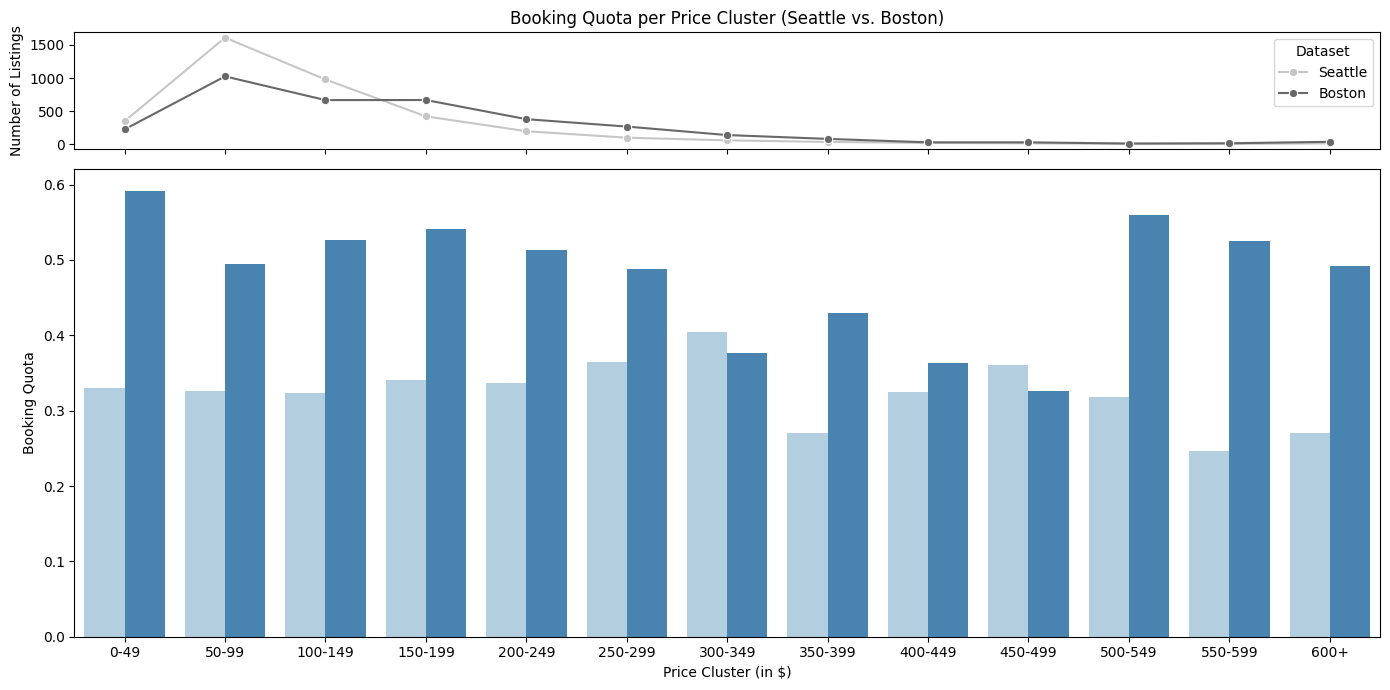

In [275]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), sharex=True, gridspec_kw={'height_ratios': [1, 4]})

# Liniendiagramm der Anzahl der Einträge
sns.lineplot(x='price_cluster', y='count', hue='dataset', marker='o', data=res_combined, palette="Greys", ax=ax1)
ax1.set_ylabel('Number of Listings')
ax1.legend(title='Dataset')
ax1.set_title('Booking Quota per Price Cluster (Seattle vs. Boston)')

# Balkendiagramm der Durchschnittswerte
sns.barplot(x='price_cluster', y='mean_quota', hue='dataset', data=res_combined, palette="Blues", ax=ax2)
ax2.set_xlabel('Price Cluster (in $)')
ax2.set_ylabel('Booking Quota')
ax2.legend().set_visible(False)  # Verstecke zweite Legende

plt.tight_layout()
plt.show()